In [1]:
import os
import random

import matplotlib.pyplot as plt
import numpy as np
import PIL
import seaborn as sns
import tensorflow as tf
from sklearn.model_selection import train_test_split

# Plot settings
# Seaborn theme
sns.set_theme(style="whitegrid", context="talk")
palette = sns.color_palette("rocket", 12)
suptitle_fontsize = 14
title_fontsize = 14
axis_fontsize = 14
label_fontsize = 14
legend_fontsize = 14


Beagle


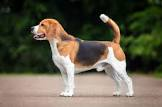

Boxer


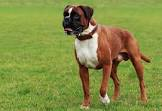

Bulldog


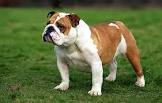

Dachshund


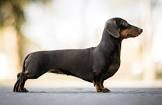

German_Shepherd


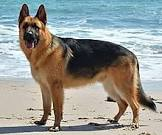

Golden_Retriever


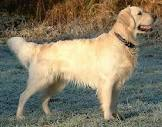

Labrador_Retriever


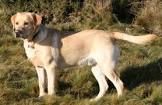

Poodle


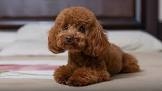

Rottweiler


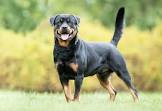

Yorkshire_Terrier


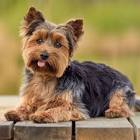

In [2]:
from IPython.display import display

class_names = sorted(os.listdir("dataset"))
class_ids = {label: i for i, label in enumerate(class_names)}
for clss in class_names:
    images = os.listdir(os.path.join("dataset", clss))
    if images == []:
        print("empty")
    image = PIL.Image.open(os.path.join("dataset", clss, images[0]))
    print(clss)
    display(image)


In [4]:
x_size = 64
y_size = 64
image_size = (x_size, y_size)

inputs = []
targets = []
for label in class_names:
    for filename in os.listdir(f"dataset/{label}"):
        filepath = f"dataset/{label}/{filename}"
        img = PIL.Image.open(filepath).convert("RGB").resize(image_size)
        inputs.append(img)
        targets.append(class_ids[label])
inputs = np.float32(inputs)
targets = np.int32(targets)

inputs.shape, targets.shape

((967, 64, 64, 3), (967,))

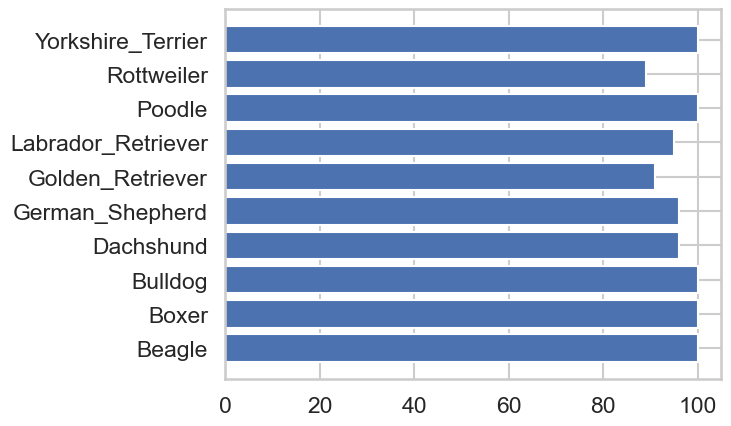

In [5]:
target_counts = np.unique(targets, return_counts=True)
plt.barh(class_names, target_counts[1])
plt.show()

In [6]:
seed = 0

tf.random.set_seed(seed=seed)
np.random.seed(seed=seed)
random.seed(seed)

### Train Test Split

In [7]:
test_size = 0.3
stratify = [targets.shape]

x_train, x_test, y_train, y_test = train_test_split(
    inputs, targets, test_size=0.3, stratify=targets, random_state=seed
)

x_train.shape, y_train.shape, x_test.shape, y_test.shape

((676, 64, 64, 3), (676,), (291, 64, 64, 3), (291,))

### Preprocessing
* Normalization
* One hot encoding on class array

In [8]:
x_train /= 255.0
x_test /= 255.0
y_train = np.eye(len(class_names))[y_train]
y_test = np.eye(len(class_names))[y_test]

y_train.shape, y_test.shape

((676, 10), (291, 10))

### MLP
Construct an MLP with the following characteristics:
* **Input Layer** - (64,64,3) that is flatten to a 64\*64\*3 vector
* **First hidden layer** - 64 neurons with ReLU activation
* **Second hidden layer** - 64 neurons with ReLU activation
* **Output layer** - 10 (equal to number of classes) neurons with Softmax activation for the calculation of probability per class

In [12]:
input_size = x_train.shape[1:]
output_size = len(class_names)

mlp = tf.keras.Sequential(
    [
        tf.keras.layers.Input(shape=input_size),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(units=x_size, activation="relu", use_bias=True),
        tf.keras.layers.Dense(units=y_size, activation="relu", use_bias=True),
        tf.keras.layers.Dense(units=output_size, activation="softmax", use_bias=True),
    ],
    name="MLP",
)
mlp.summary()

Model: "MLP"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)             │ (None, 12288)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 64)             │       786,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 791,306 (3.02 MB)

 Trainable params: 791,306 (3.02 MB)

 Non-trainable params: 0 (0.00 B)

# Training Neural Network

* Optimizer: Adam
* Learning Rate: 0.001
* Loss Function: Categorical Cross-Entropy
* Metrics: Accuracy
* Batch Size: 32
* Epochs: 50

In [13]:
optim = tf.keras.optimizers.Adam(learning_rate=0.001)
mlp.compile(optimizer=optim, loss="categorical_crossentropy", metrics=["accuracy"])

In [14]:
batch_size = 32
epochs = 50

history = mlp.fit(
    x_train,
    y_train,
    batch_size=batch_size,
    epochs=epochs,
    validation_data=(x_test, y_test),
)

Epoch 1/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.1376 - loss: 2.9698 - val_accuracy: 0.1684 - val_loss: 2.2133
Epoch 2/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.2988 - loss: 2.0175 - val_accuracy: 0.3402 - val_loss: 1.8843
Epoch 3/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.3728 - loss: 1.7966 - val_accuracy: 0.4296 - val_loss: 1.6438
Epoch 4/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4482 - loss: 1.5800 - val_accuracy: 0.4467 - val_loss: 1.6837
Epoch 5/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5799 - loss: 1.3373 - val_accuracy: 0.5533 - val_loss: 1.3605
Epoch 6/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6612 - loss: 1.1159 - val_accuracy: 0.6667 - val_loss: 1.1588
Epoch 7/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7278 - loss: 0.9365 - val_accuracy: 0.7216 - val_loss: 1.0189
Epoch 8/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7885 - loss: 0.7997 - val_accuracy: 0.7526 - val_loss

### Performance Evaluation

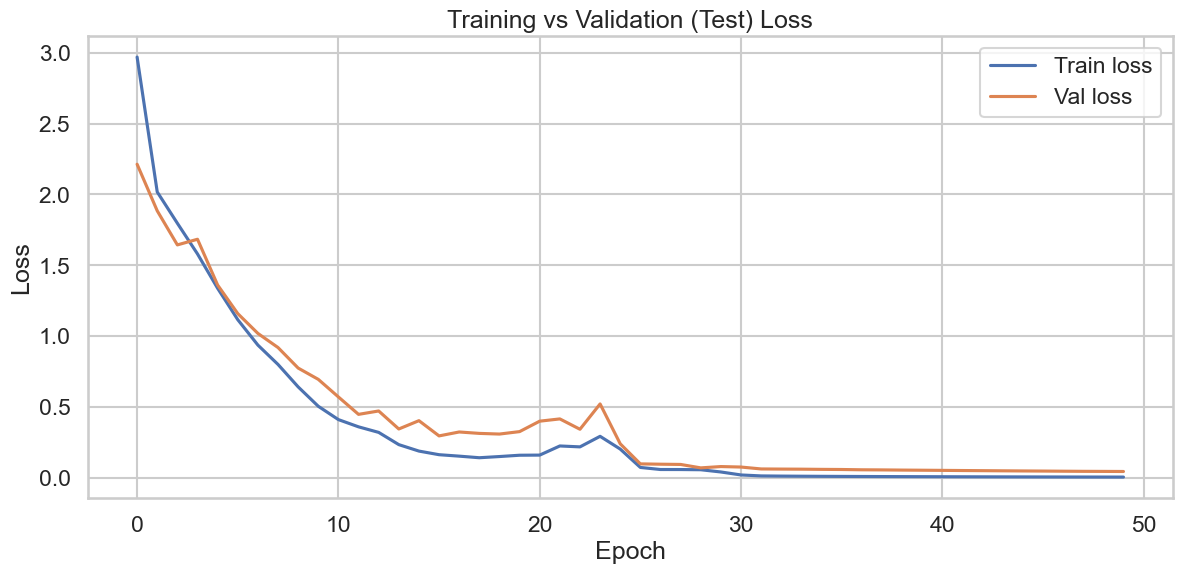

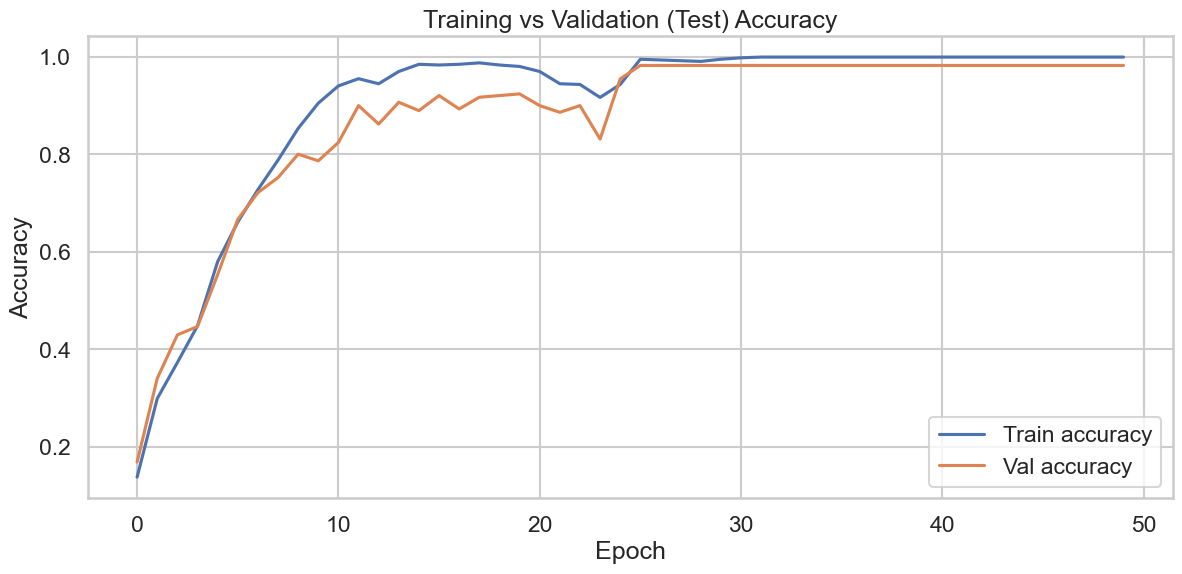

In [18]:
plt.figure(figsize=(14, 6))
plt.plot(history.history["loss"], label="Train loss")
plt.plot(history.history["val_loss"], label="Val loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training vs Validation (Test) Loss")
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(14, 6))
plt.plot(history.history["accuracy"], label="Train accuracy")
plt.plot(history.history["val_accuracy"], label="Val accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("Training vs Validation (Test) Accuracy")
plt.legend()
plt.grid(True)
plt.show()

# Building Convolutional Neural Network

In [19]:
cnn = tf.keras.Sequential(
    [
        tf.keras.layers.Input(shape=input_size),
        tf.keras.layers.Conv2D(
            filters=32, kernel_size=3, strides=2, activation="relu", use_bias=True
        ),
        tf.keras.layers.Dropout(rate=0.2),
        tf.keras.layers.Conv2D(
            filters=32, kernel_size=3, strides=1, activation="relu", use_bias=True
        ),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(units=128, activation="relu", use_bias=True),
        tf.keras.layers.Dense(units=output_size, activation="softmax", use_bias=True),
    ],
    name="CNN",
)
cnn.summary()

Model: "CNN"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 31, 31, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 31, 31, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 29, 29, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 26912)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 128)            │     3,444,864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,456,298 (13.18 MB)

 Trainable params: 3,456,298 (13.18 MB)

 Non-trainable params: 0 (0.00 B)

In [20]:
optim = tf.keras.optimizers.Adam(learning_rate=0.001)
cnn.compile(optimizer=optim, loss="categorical_crossentropy", metrics=["accuracy"])

history = cnn.fit(
    x_train,
    y_train,
    batch_size=batch_size,
    epochs=epochs,
    validation_data=(x_test, y_test),
)

Epoch 1/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 50ms/step - accuracy: 0.1036 - loss: 2.4939 - val_accuracy: 0.4467 - val_loss: 2.2696
Epoch 2/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - accuracy: 0.2929 - loss: 2.1577 - val_accuracy: 0.3918 - val_loss: 1.9166
Epoch 3/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - accuracy: 0.5902 - loss: 1.4402 - val_accuracy: 0.7045 - val_loss: 1.0072
Epoch 4/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - accuracy: 0.8269 - loss: 0.6517 - val_accuracy: 0.8488 - val_loss: 0.5126
Epoch 5/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - accuracy: 0.9645 - loss: 0.2090 - val_accuracy: 0.9691 - val_loss: 0.1631
Epoch 6/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - accuracy: 0.9852 - loss: 0.0838 - val_accuracy: 1.0000 - val_loss: 0.0468
Epoch 7/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - accuracy: 0.9941 - loss: 0.0359 - val_accuracy: 1.0000 - val_loss: 0.0153
Epoch 8/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - accuracy: 0.9970 - loss: 0.0128 - val_accuracy: 0.9828 - v

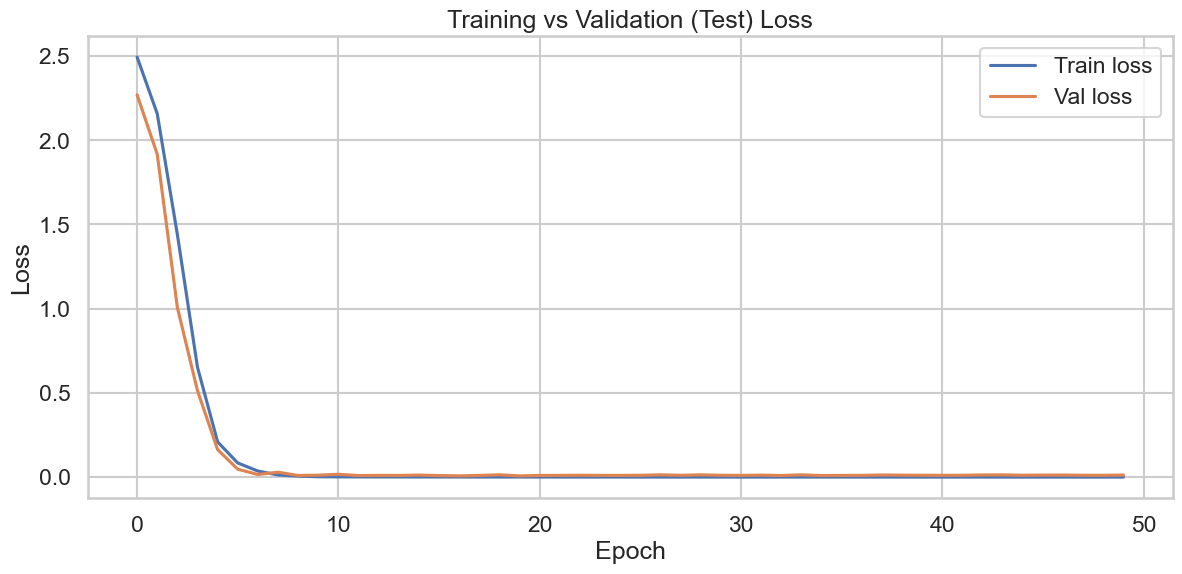

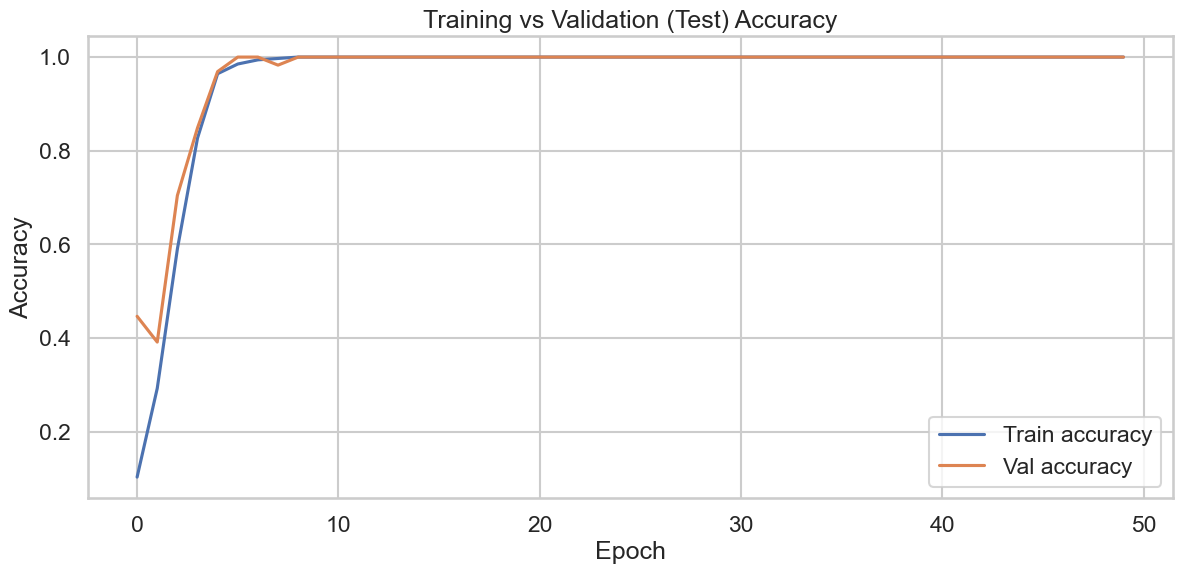

In [21]:
plt.figure(figsize=(14, 6))
plt.plot(history.history["loss"], label="Train loss")
plt.plot(history.history["val_loss"], label="Val loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training vs Validation (Test) Loss")
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(14, 6))
plt.plot(history.history["accuracy"], label="Train accuracy")
plt.plot(history.history["val_accuracy"], label="Val accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("Training vs Validation (Test) Accuracy")
plt.legend()
plt.grid(True)
plt.show()

### MLP vs CNN
As expected, `CNN` converges faster than `MLP`. That's mainly because `CNNs` has the ability to learn the spatial structure of images while `MLPs` are ignoring it.

In [23]:
import keras_tuner as kt

normalizer = tf.keras.layers.Normalization()
normalizer.adapt(x_train)


def build_cnn(input_size, output_size, hp=None):
    filters1 = hp.Int("filters1", 16, 64, step=16) if hp else 32
    filters2 = hp.Int("filters2", 16, 64, step=16) if hp else 32
    dense_units = hp.Int("dense_units", 64, 256, step=64) if hp else 128
    dropout_rate = hp.Float("dropout", 0.1, 0.5, step=0.1) if hp else 0.2
    lr = hp.Choice("lr", [1e-2, 1e-3, 1e-4]) if hp else 1e-3

    model = tf.keras.Sequential(
        [
            tf.keras.layers.Input(shape=input_size),
            normalizer,
            tf.keras.layers.Conv2D(filters1, 3, strides=2, padding="same"),
            tf.keras.layers.BatchNormalization(),
            tf.keras.layers.Activation("relu"),
            tf.keras.layers.Conv2D(filters2, 3, strides=1, padding="same"),
            tf.keras.layers.BatchNormalization(),
            tf.keras.layers.Activation("relu"),
            tf.keras.layers.Dropout(dropout_rate),
            tf.keras.layers.Flatten(),
            tf.keras.layers.Dense(dense_units),
            tf.keras.layers.BatchNormalization(),
            tf.keras.layers.Activation("relu"),
            tf.keras.layers.Dense(output_size, activation="softmax"),
        ]
    )

    model.compile(
        optimizer=tf.keras.optimizers.Adam(lr),
        loss="categorical_crossentropy",
        metrics=["accuracy"],
    )

    return model


tuner = kt.RandomSearch(
    lambda hp: build_cnn(input_size, output_size, hp),
    objective="val_accuracy",
    max_trials=20,
    executions_per_trial=1,
    directory="tuning",
    project_name="cnn_tuning",
)

tuner.search(
    x_train, y_train, validation_data=(x_test, y_test), epochs=15, batch_size=64
)

best_model = tuner.get_best_models(1)[0]
best_model.summary()

Trial 20 Complete [00h 00m 27s]
val_accuracy: 0.975944995880127

Best val_accuracy So Far: 1.0
Total elapsed time: 00h 09m 59s


c:\Users\zikopis\Documents\DWS\DWS_ML\.venv\lib\site-packages\keras\src\saving\saving_lib.py:797: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ normalization (Normalization)   │ (None, 64, 64, 3)      │             7 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 32, 32, 64)     │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 32, 32, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 32, 32, 48)     │        27,696 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 32, 32, 48)     │           192 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 32, 32, 48)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 32, 32, 48)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 49152)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │     3,145,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,176,641 (12.12 MB)

 Trainable params: 3,176,282 (12.12 MB)

 Non-trainable params: 359 (1.41 KB)